# <font color = green>`MS Dissertation` - Future transaction prediction on highly imbalanced dataset <font>
##### <font color = black> By:<font> 
   <font color = red>    **MOHAMMAD SHAHID RASHID** <font>   <font color = blue>     (mohammad.shahid.rashid@gmail.com) <font> 
   <font color = blue>  - **MS DS C12** <font>

# <font color = black> Design flow will be as below <font> 

#### <font color = red> Milestone step 1  <font> - `Reading & Understanding data`
- shape
- info
- describe
- Missing values

#### <font color = red> Milestone step 2  <font> - `EDA`
- Bar plot target variable
- Outlier Treatment 
- Distribution plot other variable against target variable

#### <font color = red> Milestone step 3  <font> - `Data Preperation`

    - Elimination of Variables
    - Transformation into Categorical Variables
    - skewness of the data
    - Identification of missing values
    - Univariant analysis
    - Treatement of missing values
    - Train Test split
    - Feature Scaling

#### <font color = red> Milestone step 4  <font> - `Building Model  and evaluating Model ( on imbalanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost


#### <font color = red> Milestone step 5  <font> - `Choosing best model on the imbalanced data`    

#### <font color = red> Milestone step 6  <font> - `Handling data imbalance and process each model of Milestone step 7 on each imbalance technique one by one`
- Undersampling
- Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)
- AdaSyn (Adaptive Synthetic Sampling)

#### <font color = red> Milestone step 7  <font> - `Building and evaluating Model ( on balanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost


#### <font color = red> Milestone step 8  <font> - `Choosing best model on the balanced data`

#### <font color = red> Milestone step 9  <font> - `Business Summary Report`

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Import the numpy and pandas package
import os
import numpy as np
import pandas as pd

#Set display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge

#Visualising
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#scikit-learn library
from sklearn import metrics
from sklearn import preprocessing

#### <font color = red> Milestone step 1  <font> - `Reading & Understanding data`
- shape
- info
- describe
- Missing values

##### Reading train data into a dataframe

In [3]:
ftp = pd.read_csv(r'E:\Upgrad\Masters Program in Data Science\LJMU\Dataset\train.csv')
ftp.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
#Shape
ftp.shape

(200000, 202)

In [5]:
#info
ftp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
#describe
ftp.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [7]:
# Features with Missing values %
ftp_miss_cols = (round(((ftp.isnull().sum()/len(ftp.index))*100),2).to_frame('Null %')).sort_values('Null %')
ftp_miss_cols

,Null %
ID_code,0.0
var_126,0.0
var_127,0.0
var_128,0.0
var_129,0.0
var_130,0.0
var_131,0.0
var_132,0.0
var_133,0.0
var_134,0.0


#### <font color = red> Milestone step 2  <font> - `EDA`
- Bar plot target variable
- Outlier Treatment 
- Distribution plot other variable against target variable

#### <font color = red> Milestone step 3  <font> - `Data Preperation`

    - Elimination of Variables
    - Transformation into Categorical Variables
    - skewness of the data
    - Identification of missing values
    - Univariant analysis
    - Treatement of missing values
    - Train Test split
    - Feature Scaling

In [8]:
# lets check class distribution 
clas = ftp['target'].value_counts()
clas

0    179902
1    20098 
Name: target, dtype: int64

### Class imbalance with the target variable

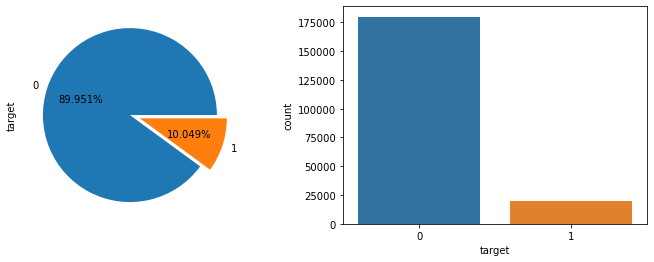

In [9]:
f,ax=plt.subplots(1,2, figsize=(12,4))
ftp.target.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('target',data=ftp)
plt.show()

You can see the data is highly imbalanced as only 10% target variable is yes, which would give hgh chance of negative prediction, henceforth this need to fix the imbalancing befoe modelling

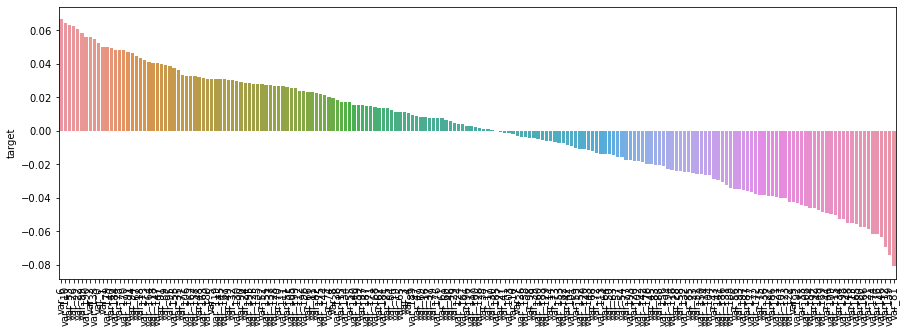

In [10]:
### Identify the correlation of the variables
cor = ftp.corr()
cor = cor['target'].sort_values(ascending=False)
cor = cor[1:]
cor_df = pd.DataFrame(cor)
plt.figure(figsize=(15,5))
sns.barplot(y=cor_df.target,x=cor_df.index)
plt.xticks(rotation=90)
plt.show()

In [11]:
corr = ftp.corr().abs()
corr[corr == 1] = 0
s = corr.unstack().sort_values(ascending=False)

In [12]:
print(s.head())

target   var_81     0.080917
var_81   target     0.080917
var_139  target     0.074080
target   var_139    0.074080
         var_12     0.069489
dtype: float64


 Correllation is highest with var_81 vs target variable which is 0.0809 which we can assume ~0

In [13]:
ftp.info('ID_code')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 202 columns):
 #   Column   Dtype  
---  ------   -----  
 0   ID_code  object 
 1   target   int64  
 2   var_0    float64
 3   var_1    float64
 4   var_2    float64
 5   var_3    float64
 6   var_4    float64
 7   var_5    float64
 8   var_6    float64
 9   var_7    float64
 10  var_8    float64
 11  var_9    float64
 12  var_10   float64
 13  var_11   float64
 14  var_12   float64
 15  var_13   float64
 16  var_14   float64
 17  var_15   float64
 18  var_16   float64
 19  var_17   float64
 20  var_18   float64
 21  var_19   float64
 22  var_20   float64
 23  var_21   float64
 24  var_22   float64
 25  var_23   float64
 26  var_24   float64
 27  var_25   float64
 28  var_26   float64
 29  var_27   float64
 30  var_28   float64
 31  var_29   float64
 32  var_30   float64
 33  var_31   float64
 34  var_32   float64
 35  var_33   float64
 36  var_34   float64
 37  var_35   float64
 38  var

We could see only ID_code variable is object type , rest other is either float or interger which is fine for us to run the analysis.

In [14]:
#let us review ID_code variable to understand more about its transformation
ftp['ID_code'].nunique()

200000

In [15]:
ftp.shape

(200000, 202)

From this we can conclude this has all unique values, and hencefroth this can be dropped from the analysis considering all values are unique and will not contribute anythng in the analysis

In [16]:
#dropping OD_code varaible
ftp.drop("ID_code", inplace=True, axis=1)

In [17]:
ftp.shape

(200000, 201)

# Lets check the skewness of the data

In [18]:
skewList = []
for colName in ftp.columns:
    if colName not in ['ID_code', 'target']:
        skewList.append([colName, abs(ftp[colName].skew())])

skewList.sort(key=lambda x: x[1], reverse=True)

skewdf = pd.DataFrame.from_records(skewList, columns=['colName', 'Skewness'])

In [19]:
print(skewdf.head(10))

   colName  Skewness
0  var_44   0.340172
1  var_168  0.267414
2  var_2    0.260313
3  var_179  0.242891
4  var_93   0.238091
5  var_0    0.235639
6  var_163  0.234780
7  var_81   0.232526
8  var_80   0.220236
9  var_86   0.216859


From the above skewness we can see var_44 is highest among all, so lets plot the data point for this variable to see the skewness distribution

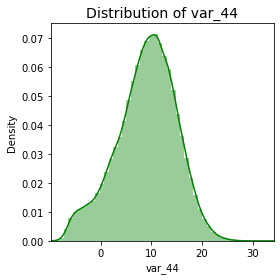

In [20]:
fig, ax = plt.subplots( figsize=(4,4), )

sns.distplot(ftp["var_44"], ax=ax, color='g')
ax.set_title('Distribution of var_44', fontsize=14)
ax.set_xlim([min(ftp["var_44"]), max(ftp["var_44"])])
fig.show()

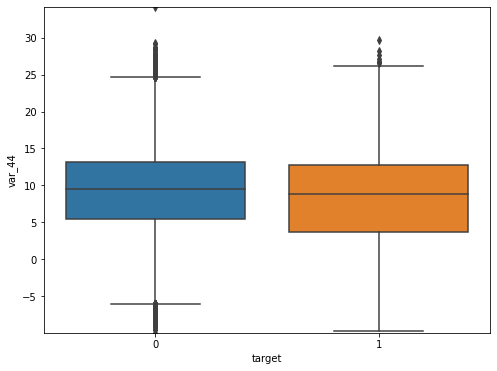

In [21]:
var = 'var_44'
temp = pd.concat([ftp['target'], ftp[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='target', y=var, data=temp)
fig.axis(ymin= min(ftp[var]), ymax=max(ftp[var]));
f.show()

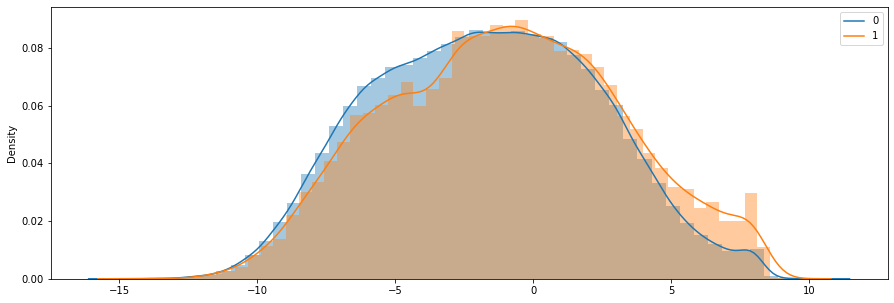

In [22]:
# distribution of var_0
fig = plt.figure(figsize=(15,5))
var_0_0 = ftp.loc[ftp['target']==0,ftp.columns[2]].values.reshape(-1,)
var_0_1 = ftp.loc[ftp['target']==1,ftp.columns[2]].values.reshape(-1,)
sns.distplot(var_0_0)
sns.distplot(var_0_1)
plt.legend([0, 1])
plt.show()

In [23]:
def getplot_var(df, r=4, c=4):
    fig, axs = plt.subplots(r, c, figsize=(c*4, r*3))
    cnt = 0
    for i in range(r):
        for j in range(c):
            sns.distplot(df.loc[df['target']==0,df.columns[cnt+2]].values.reshape(-1,), ax=axs[i,j], axlabel=str(df.columns[cnt+2]))
            sns.distplot(df.loc[df['target']==1,df.columns[cnt+2]].values.reshape(-1,), ax=axs[i,j], axlabel=str(df.columns[cnt+2]))
            axs[i,j].legend([0, 1])
            cnt += 1
    plt.tight_layout()
    return

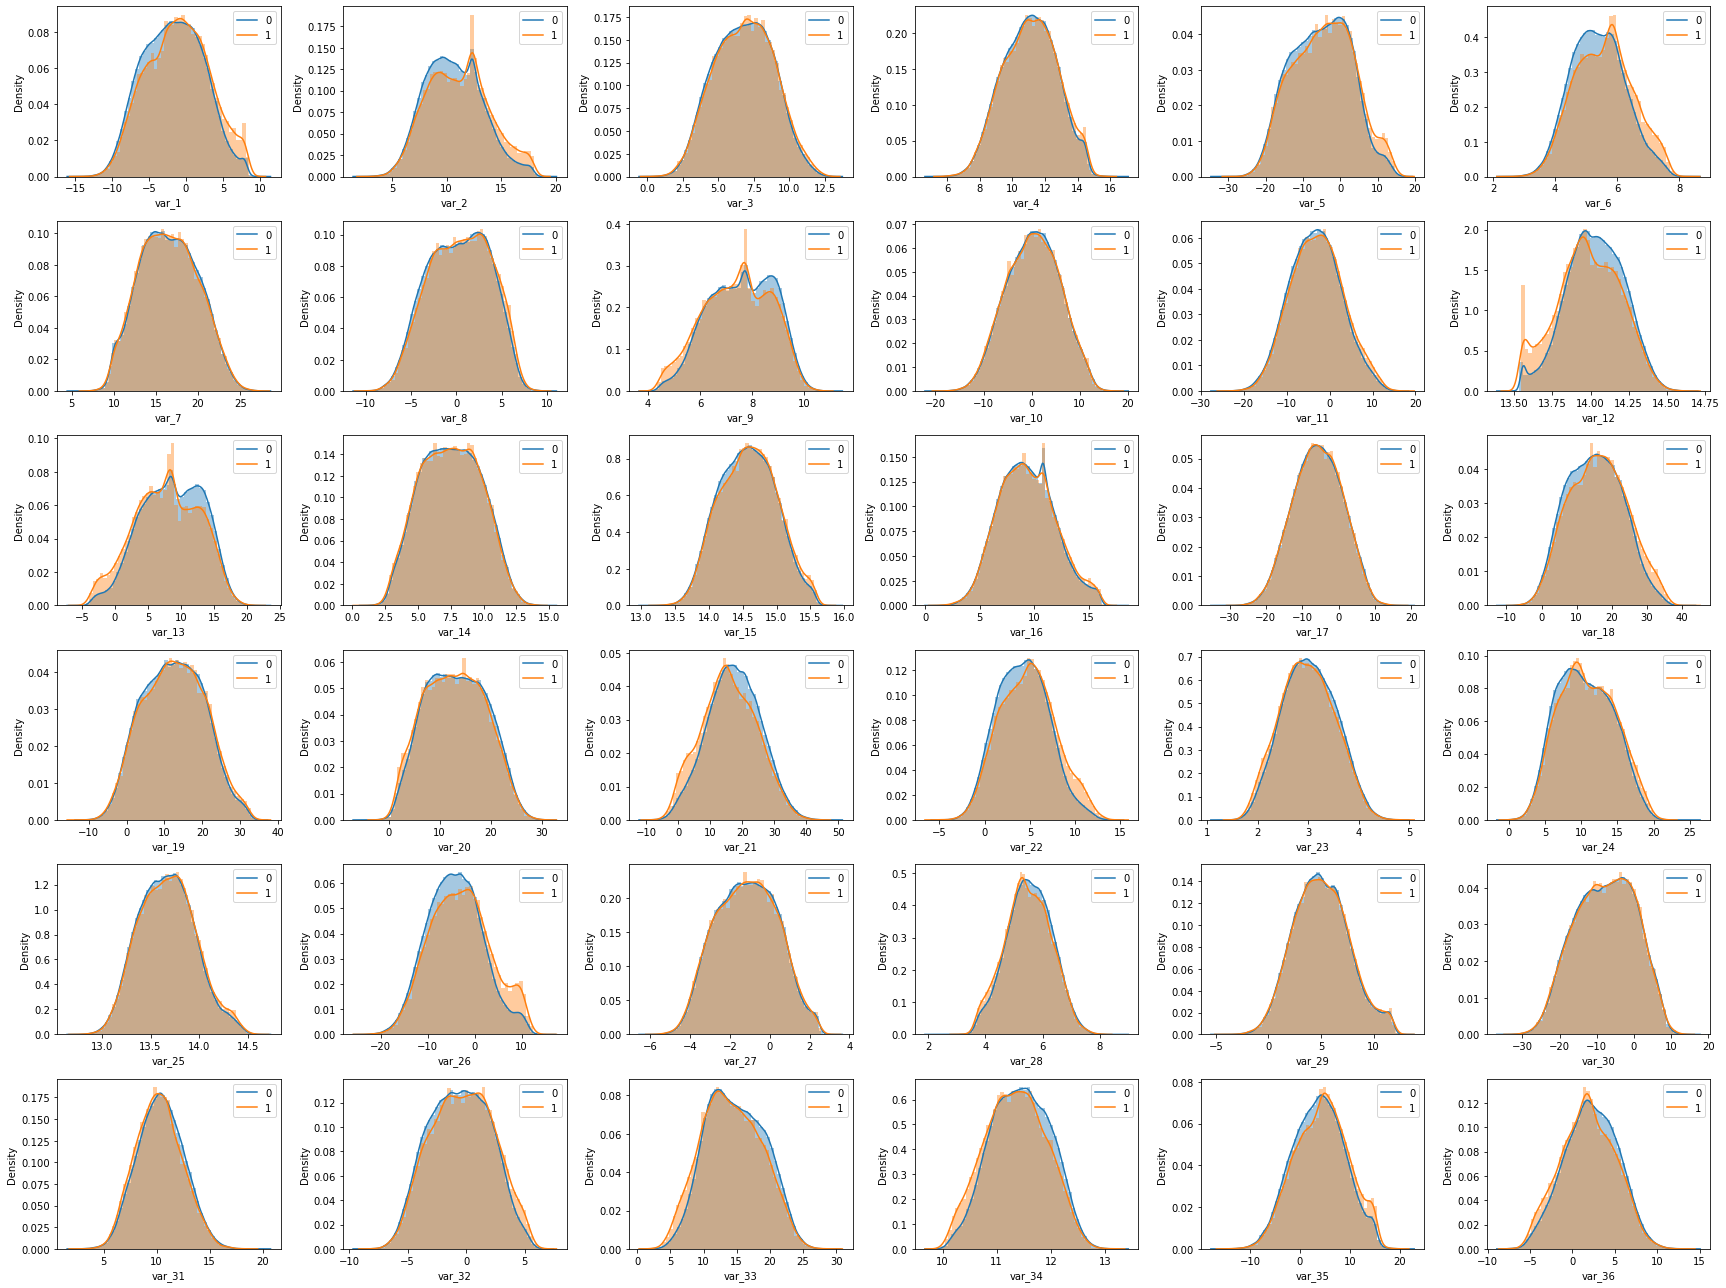

In [24]:
getplot_var(ftp, 6, 6)

All most all variable are normally distributed

##### Train-Test Split

In [25]:
# Import the library
from sklearn.model_selection import train_test_split

In [26]:
# As class is target variable, so capturing all feature variables in x
X = ftp.drop(['target'], axis=1)

In [27]:
# Capturing target variable to y
y = ftp['target']

In [28]:
# split train and test with 0.8 and 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [29]:
X_train.shape

(160000, 200)

In [30]:
y_train.shape

(160000,)

In [31]:
X_test.shape

(40000, 200)

In [32]:
y_test.shape

(40000,)

In [33]:
# We will use Standard scaler technique to scale this vairable
# Standardization method
from sklearn.preprocessing import StandardScaler

In [34]:
# Instantiate the Scaler
scaler = StandardScaler()

In [35]:
# scaler fit the data and transform
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[ 0.64600264,  1.12708273,  1.71436738, ...,  0.81643722,
        -1.80116703,  0.74486672],
       [-1.69369733, -0.26129207, -0.24203235, ..., -1.35208566,
        -0.46779227,  0.51978232],
       [-0.42531652,  0.74292244, -0.4800169 , ..., -1.46052808,
         1.17432382,  1.52103868],
       ...,
       [-0.39787464,  0.64888064, -0.11705257, ..., -0.46426765,
        -1.56208257,  1.33926409],
       [-0.4569372 ,  0.76063546,  0.25004239, ...,  0.93377191,
         0.06260269, -0.62142532],
       [-0.82618513, -0.24222221, -0.0101111 , ..., -0.52011549,
        -0.55833293,  1.01252248]])

In [37]:
#Scaling of test data can be directly scal transofrm
X_test= scaler.transform(X_test)
X_test

array([[-0.66229064, -0.10337979,  0.59375574, ..., -1.31467303,
         0.82686946,  0.79814085],
       [ 2.50260706,  0.37950958, -0.10663127, ...,  1.15195804,
        -0.45099228,  0.65981992],
       [ 1.05759793,  0.30382221, -0.97133373, ...,  0.4116217 ,
         0.81667659,  0.60856934],
       ...,
       [ 0.68552026,  0.0217708 , -0.62921199, ...,  0.80852093,
        -1.1121018 ,  0.22770007],
       [-1.80126028,  0.28258139, -0.36435944, ...,  0.26110364,
        -0.22718055, -1.37210626],
       [-1.05532812, -0.63319139,  1.18693602, ..., -0.50265626,
         0.71129483,  1.17378341]])

#### <font color = red> Milestone step 4  <font> - `Building Model  and evaluating Model ( on imbalanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [38]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [39]:
# Impoting metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [41]:
# Creating KFold object with 5 splits, and C paramters set as 0.01,0.1,1,10,100,1000 , and identify optimum value of C
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [42]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.046903,0.154987,0.032580,0.004402,0.01,{'C': 0.01},0.852725,0.859241,0.855636,0.864382,0.861880,0.858773,0.004189,1,0.862762,0.861142,0.862042,0.859900,0.860402,0.861249,0.001046
1,0.950081,0.089114,0.045396,0.001822,0.1,{'C': 0.1},0.852717,0.859232,0.855633,0.864371,0.861873,0.858765,0.004188,2,0.862763,0.861143,0.862043,0.859901,0.860404,0.861251,0.001045
2,1.244190,0.528646,0.052794,0.033935,1,{'C': 1},0.852716,0.859231,0.855633,0.864370,0.861873,0.858765,0.004188,3,0.862763,0.861143,0.862044,0.859901,0.860404,0.861251,0.001045
3,1.347457,0.392370,0.036096,0.006025,10,{'C': 10},0.852716,0.859231,0.855633,0.864370,0.861873,0.858765,0.004188,4,0.862763,0.861143,0.862044,0.859901,0.860404,0.861251,0.001045
4,1.203084,0.133565,0.046819,0.015142,100,{'C': 100},0.852716,0.859231,0.855633,0.864370,0.861873,0.858764,0.004188,5,0.862763,0.861143,0.862044,0.859901,0.860404,0.861251,0.001045
5,1.092826,0.090718,0.043280,0.004568,1000,{'C': 1000},0.852716,0.859231,0.855633,0.864370,0.861873,0.858764,0.004188,6,0.862763,0.861143,0.862044,0.859901,0.860404,0.861251,0.001045


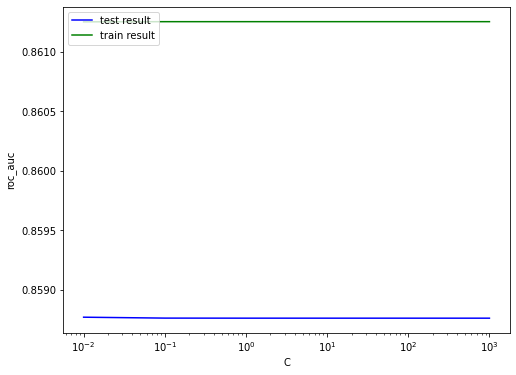

In [43]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [44]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.8587726743200991 at C = 0.01


In [45]:
#logistic regression Instantiate
logistic_imb = LogisticRegression(C=0.01)

In [46]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [47]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [48]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
def train_pred():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train, y_train_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train, y_train_pred))

    # classification_report
    print(classification_report(y_train, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

[[142079   1893]
 [ 11709   4319]]
Accuracy:- 0.9149875
Sensitivity:- 0.26946593461442475
Specificity:- 0.9868516100352847
F1-Score:- 0.3883992805755396
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    143972
           1       0.70      0.27      0.39     16028

    accuracy                           0.91    160000
   macro avg       0.81      0.63      0.67    160000
weighted avg       0.90      0.91      0.90    160000

roc_auc train score= 0.8609861010533542


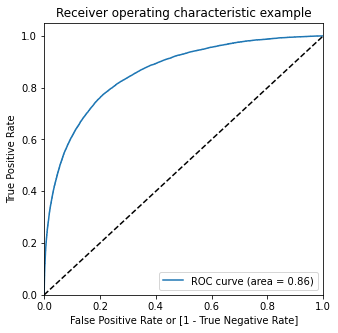

In [50]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


In [51]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [52]:
def test_pred():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

[[35458   472]
 [ 3019  1051]]
Accuracy:- 0.912725
Sensitivity:- 0.2582309582309582
Specificity:- 0.9868633453938214
F1-Score:- 0.37582692651528693
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35930
           1       0.69      0.26      0.38      4070

    accuracy                           0.91     40000
   macro avg       0.81      0.62      0.66     40000
weighted avg       0.90      0.91      0.89     40000

roc_auc test score= 0.8615646585532474


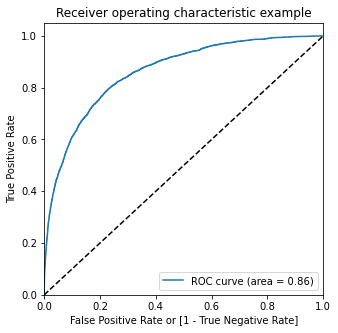

In [53]:

# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.91                 
  - Sensitivity =  0.27
  - Specifivty  =  0.98
  - F1-Score    =  0.39
  - ROC         =  0.86

- Test data                       
  - Accuracy    =  0.91                   
  - Sensitivity =  0.25
  - Specifivty  =  0.98
  - F1-Score    =  0.37
  - ROC         =  0.86

We could see Train set learning is almost same for test data set.

# Decision Tree

In [54]:
# Importing decision tree classifier module
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,19.755221,0.859966,0.080430,0.031104,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.622969,0.621541,0.625931,0.623480,0.001828,7
1,18.622014,0.684420,0.069475,0.006489,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.622969,0.621541,0.625931,0.623480,0.001828,7
2,17.207180,0.302152,0.062474,0.000020,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.623012,0.621608,0.626085,0.623568,0.001870,5
3,17.819091,0.809622,0.080429,0.015713,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.623012,0.621608,0.626085,0.623568,0.001870,5
4,33.222024,1.391191,0.067679,0.007374,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.647654,0.653386,0.660195,0.653745,0.005126,4
5,33.563334,0.326116,0.072604,0.004021,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.648014,0.653243,0.660418,0.653891,0.005085,3
6,34.675474,0.654653,0.067681,0.007375,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.662649,0.658850,0.662363,0.661287,0.001727,2
7,38.183222,5.672485,0.082163,0.024426,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.662656,0.658850,0.662363,0.661290,0.001729,1


In [57]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.6612898980336648
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [58]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [59]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

[[143645    327]
 [ 15656    372]]
Accuracy:- 0.90010625
Sensitivity:- 0.02320938357873721
Specificity:- 0.9977287250298669
F1-Score:- 0.04447898607042506
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    143972
           1       0.53      0.02      0.04     16028

    accuracy                           0.90    160000
   macro avg       0.72      0.51      0.50    160000
weighted avg       0.86      0.90      0.86    160000

roc_auc train score= 0.7054493851891493


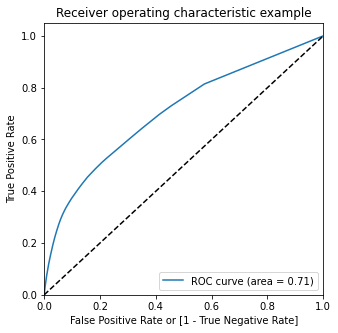

In [60]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [61]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

[[35824   106]
 [ 4006    64]]
Accuracy:- 0.8972
Sensitivity:- 0.015724815724815724
Specificity:- 0.9970498190926802
F1-Score:- 0.030188679245283016
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35930
           1       0.38      0.02      0.03      4070

    accuracy                           0.90     40000
   macro avg       0.64      0.51      0.49     40000
weighted avg       0.85      0.90      0.85     40000

roc_auc test score= 0.664367091074578


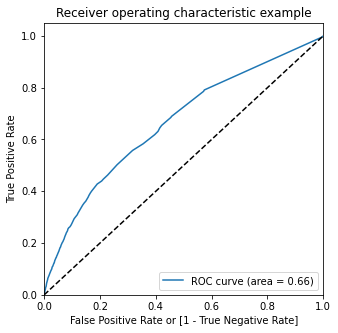

In [62]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.90                 
  - Sensitivity =  0.02
  - Specifivty  =  0.99
  - F1-Score    =  0.04
  - ROC         =  0.71

- Test data                       
  - Accuracy    =  0.89                   
  - Sensitivity =  0.01
  - Specifivty  =  0.99
  - F1-Score    =  0.03
  - ROC         =  0.66

#### Random forest

In [63]:
# Importing random forest classifier module
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [65]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy of 0.899825 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [84]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [85]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [86]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

[[143972      0]
 [ 16028      0]]
Accuracy:- 0.899825
Sensitivity:- 0.0
Specificity:- 1.0
F1-Score:- 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    143972
           1       0.00      0.00      0.00     16028

    accuracy                           0.90    160000
   macro avg       0.45      0.50      0.47    160000
weighted avg       0.81      0.90      0.85    160000

roc_auc train score= 0.8167243178631266


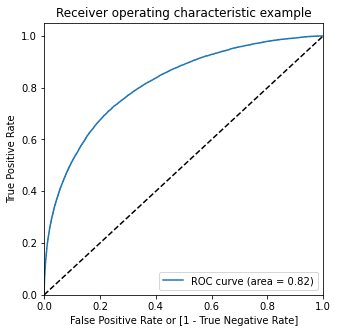

In [87]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]
train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [88]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

[[35930     0]
 [ 4070     0]]
Accuracy:- 0.89825
Sensitivity:- 0.0
Specificity:- 1.0
F1-Score:- 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35930
           1       0.00      0.00      0.00      4070

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

roc_auc test score= 0.7946104731353828


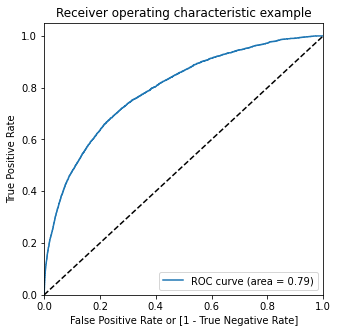

In [89]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Random Forest Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  0.74
  - Specifivty  =  1.00
  - F1-Score    =  0.80
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  1.00                   
  - Sensitivity =  0.64
  - Specifivty  =  1.00
  - F1-Score    =  0.67
  - ROC         =  0.96

#### XGBoost

In [90]:
!pip install xgboost

In [91]:
# Importing XGBoost
from xgboost import XGBClassifier

In [92]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[01:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:29]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [93]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,88.761135,3.061718,0.178391,0.002110,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.868244,0.873904,0.873216,0.871788,0.002522,3,0.894633,0.894197,0.893759,0.894196,0.000357
1,135.551251,5.592824,0.175013,0.006181,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.865264,0.872060,0.870724,0.869349,0.002940,4,0.898089,0.896904,0.897244,0.897412,0.000498
2,156.768171,8.093231,0.169277,0.008697,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.864235,0.867367,0.869794,0.867132,0.002275,5,0.899647,0.898795,0.897827,0.898756,0.000743
3,86.610879,1.272040,0.186449,0.020999,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.859749,0.861187,0.864481,0.861806,0.001981,6,0.899978,0.899449,0.898274,0.899234,0.000712
4,133.860302,5.708523,0.162524,0.008723,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.872343,0.871917,0.872503,0.872254,0.000248,2,0.913666,0.913644,0.911440,0.912917,0.001044
5,161.727416,0.527507,0.221422,0.046208,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.874204,0.876034,0.877611,0.875950,0.001392,1,0.918303,0.919807,0.917484,0.918531,0.000962


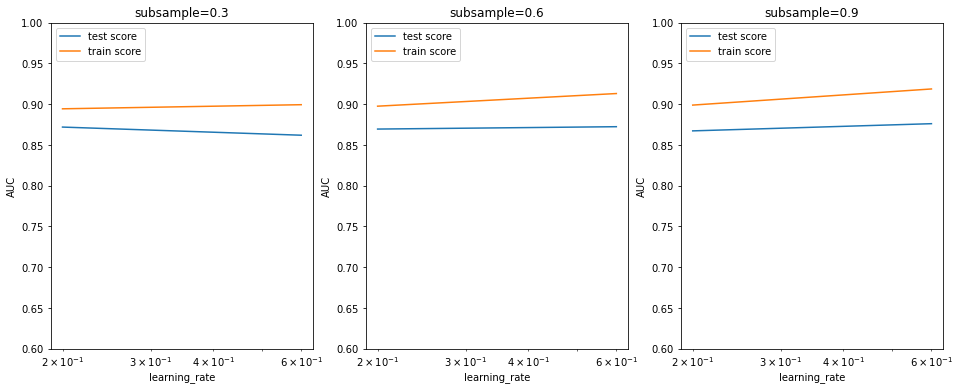

In [94]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [95]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [96]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[01:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [97]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

[[143791    181]
 [  6251   9777]]
Accuracy:- 0.9598
Sensitivity:- 0.6099950087347142
Specificity:- 0.9987428111021588
F1-Score:- 0.7524821057492497
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143972
           1       0.98      0.61      0.75     16028

    accuracy                           0.96    160000
   macro avg       0.97      0.80      0.87    160000
weighted avg       0.96      0.96      0.96    160000

roc_auc train score= 0.8167243178631266


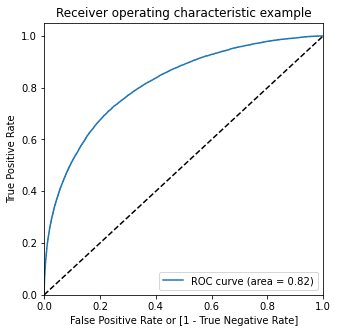

In [98]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]
train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [99]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

[[35930     0]
 [ 4070     0]]
Accuracy:- 0.89825
Sensitivity:- 0.0
Specificity:- 1.0
F1-Score:- 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35930
           1       0.00      0.00      0.00      4070

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

roc_auc test score= 0.8617349665025702


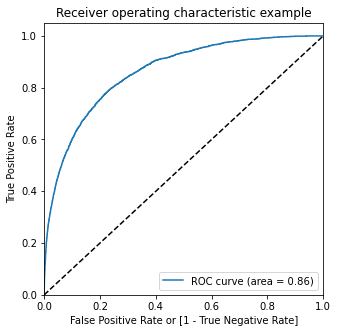

In [100]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### XGBoost Model Summary

- Train data                       
  - Accuracy    =  0.95                 
  - Sensitivity =  0.60
  - Specifivty  =  0.99
  - F1-Score    =  0.75
  - ROC         =  0.82

- Test data                       
  - Accuracy    =  0.89                   
  - Sensitivity =  0.00
  - Specifivty  =  1.00
  - F1-Score    =  0.00
  - ROC         =  0.86


#### <font color = red> Milestone step 5  <font> - `Choosing best model on the imbalanced data` 

In [103]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9810465266445239
Threshold= 0.1632986


#### <font color = red> Milestone step 6  <font> - `Handling data imbalance and process each model of Milestone step 7 on each imbalance technique one by one`
- Undersampling
- Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)
- AdaSyn (Adaptive Synthetic Sampling)

## Undersampling
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [104]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [105]:
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Before sampling class distribution:-',Counter(y_train))
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 143972, 1: 16028})
New class distribution:- Counter({0: 16028, 1: 16028})


##### Logistic regression

In [106]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Lets take tradtional params to identify C value
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.171020,0.031914,0.008051,0.007010,0.01,{'C': 0.01},0.847614,0.862127,0.857448,0.855207,0.861492,0.856778,0.005248,1,0.864306,0.860748,0.862031,0.862651,0.861061,0.86216,0.001270
1,0.173606,0.016755,0.013159,0.003159,0.1,{'C': 0.1},0.847548,0.862058,0.857416,0.855144,0.861457,0.856725,0.005254,2,0.864308,0.860746,0.862034,0.862652,0.861061,0.86216,0.001271
2,0.223690,0.038544,0.015939,0.006428,1,{'C': 1},0.847541,0.862050,0.857410,0.855139,0.861457,0.856719,0.005255,3,0.864309,0.860746,0.862033,0.862653,0.861061,0.86216,0.001271
3,0.289667,0.045203,0.015806,0.002933,10,{'C': 10},0.847541,0.862048,0.857409,0.855137,0.861456,0.856718,0.005255,6,0.864309,0.860746,0.862033,0.862653,0.861061,0.86216,0.001271
4,0.213424,0.034328,0.012694,0.003049,100,{'C': 100},0.847541,0.862048,0.857409,0.855138,0.861456,0.856718,0.005255,4,0.864309,0.860746,0.862033,0.862653,0.861061,0.86216,0.001272
5,0.203124,0.050102,0.008179,0.004610,1000,{'C': 1000},0.847541,0.862048,0.857409,0.855138,0.861456,0.856718,0.005255,4,0.864309,0.860746,0.862033,0.862653,0.861061,0.86216,0.001272


 The highest test roc_auc is 0.8567776372392615 at C = 0.01


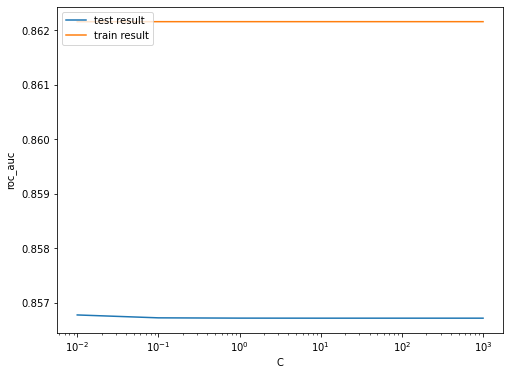

In [107]:
# train and validation scores for C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Identify best score and optimum C value
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

In [108]:
# Logistic regression with optimal C=0.01
logistic_bal_rus = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [109]:
def train_pred_rus():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

    # classification_report
    print(classification_report(y_train_rus, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [110]:
def test_pred_rus():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

[[12560  3468]
 [ 3532 12496]]
Accuracy:- 0.7816321437484403
Sensitivity:- 0.7796356376341402
Specificity:- 0.7836286498627402
F1-Score:- 0.7811952988247061
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     16028
           1       0.78      0.78      0.78     16028

    accuracy                           0.78     32056
   macro avg       0.78      0.78      0.78     32056
weighted avg       0.78      0.78      0.78     32056

roc_auc train score= 0.8616252588043298


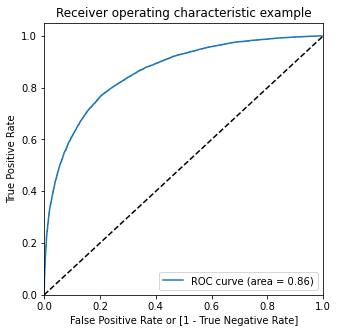

In [111]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [112]:
## Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

[[28034  7896]
 [  889  3181]]
Accuracy:- 0.780375
Sensitivity:- 0.7815724815724816
Specificity:- 0.7802393543000278
F1-Score:- 0.4200171651152043
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35930
           1       0.29      0.78      0.42      4070

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

roc_auc test score= 0.8612702080417081


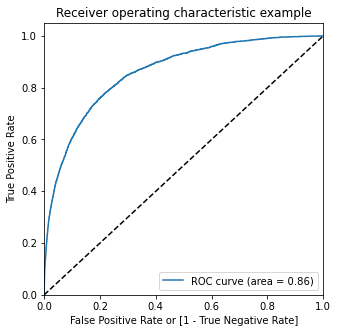

In [113]:

# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.78                 
  - Sensitivity =  0.77
  - Specifivty  =  0.78
  - F1-Score    =  0.78
  - ROC         =  0.86

- Test data                       
  - Accuracy    =  0.78                   
  - Sensitivity =  0.78
  - Specifivty  =  0.78
  - F1-Score    =  0.42
  - ROC         =  0.86

##### Decision Tree

In [115]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best roc_auc:- 0.6532838565771472
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [116]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [117]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

[[11295  4733]
 [ 5598 10430]]
Accuracy:- 0.6777202395807337
Sensitivity:- 0.6507362116296481
Specificity:- 0.7047042675318194
F1-Score:- 0.6687826616652239
              precision    recall  f1-score   support

           0       0.67      0.70      0.69     16028
           1       0.69      0.65      0.67     16028

    accuracy                           0.68     32056
   macro avg       0.68      0.68      0.68     32056
weighted avg       0.68      0.68      0.68     32056

roc_auc train score= 0.7292093271202649


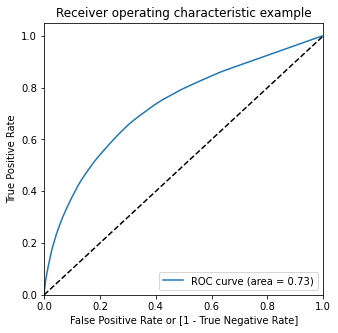

In [118]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [119]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

[[23095 12835]
 [ 1607  2463]]
Accuracy:- 0.63895
Sensitivity:- 0.6051597051597052
Specificity:- 0.642777623156137
F1-Score:- 0.2543370508054523
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     35930
           1       0.16      0.61      0.25      4070

    accuracy                           0.64     40000
   macro avg       0.55      0.62      0.51     40000
weighted avg       0.86      0.64      0.71     40000

roc_auc test score= 0.6634637545979043


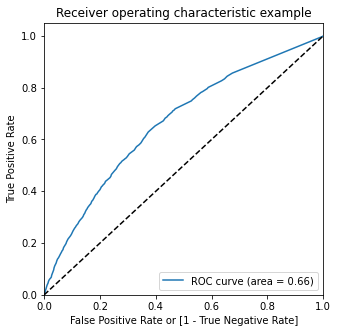

In [120]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.67                 
  - Sensitivity =  0.65
  - Specifivty  =  0.70
  - F1-Score    =  0.66
  - ROC         =  0.73

- Test data                       
  - Accuracy    =  0.63                   
  - Sensitivity =  0.60
  - Specifivty  =  0.64
  - F1-Score    =  0.25
  - ROC         =  0.66

##### Random forest

In [121]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
We can get roc-auc of 0.8150365868340337 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 300}


In [122]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=300)

In [123]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

[[12694  3334]
 [ 4354 11674]]
Accuracy:- 0.7601697030197155
Sensitivity:- 0.7283503868230596
Specificity:- 0.7919890192163713
F1-Score:- 0.752287665936332
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     16028
           1       0.78      0.73      0.75     16028

    accuracy                           0.76     32056
   macro avg       0.76      0.76      0.76     32056
weighted avg       0.76      0.76      0.76     32056

roc_auc train score= 0.8411993316350741


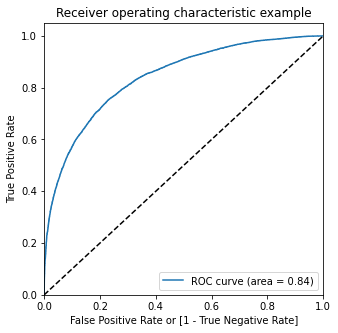

In [124]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [126]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

[[27584  8346]
 [ 1223  2847]]
Accuracy:- 0.760775
Sensitivity:- 0.6995085995085996
Specificity:- 0.7677150013915948
F1-Score:- 0.37305903164515497
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     35930
           1       0.25      0.70      0.37      4070

    accuracy                           0.76     40000
   macro avg       0.61      0.73      0.61     40000
weighted avg       0.89      0.76      0.80     40000

roc_auc test score= 0.8119264458396103


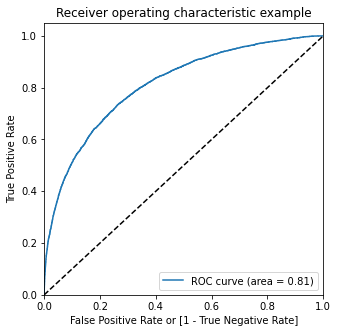

In [127]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Random Forest Model Summary

- Train data                       
  - Accuracy    =  0.76                 
  - Sensitivity =  0.72
  - Specifivty  =  0.79
  - F1-Score    =  0.75
  - ROC         =  0.84

- Test data                       
  - Accuracy    =  0.76                   
  - Sensitivity =  0.69
  - Specifivty  =  0.76
  - F1-Score    =  0.37
  - ROC         =  0.81

##### XGBoost

In [128]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)   
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[03:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:20]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.820620,1.290724,0.041654,0.007368,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.863115,0.865200,0.869976,0.866097,0.002872,3,0.906006,0.906309,0.902969,0.905095,0.001508
1,27.479570,1.198189,0.036461,0.007378,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.868580,0.867136,0.869861,0.868526,0.001113,1,0.912374,0.912208,0.908662,0.911081,0.001712
2,33.603482,1.625905,0.036452,0.007366,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.864471,0.866316,0.866893,0.865893,0.001033,4,0.915869,0.914803,0.912594,0.914422,0.001364
3,17.114260,0.398313,0.037639,0.006686,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.843405,0.843950,0.847359,0.844905,0.001750,6,0.911330,0.910018,0.907945,0.909764,0.001393
4,27.250862,0.934802,0.045206,0.002345,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.858434,0.861760,0.861874,0.860689,0.001595,5,0.932811,0.932480,0.930773,0.932022,0.000893
5,58.376284,8.054442,0.064162,0.003292,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.864271,0.868472,0.870189,0.867644,0.002486,2,0.942544,0.942249,0.940917,0.941903,0.000708


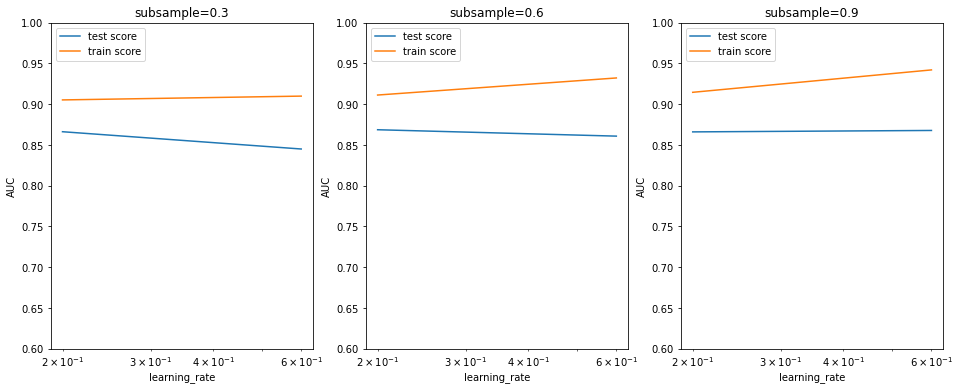

In [129]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [130]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [131]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[03:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [132]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

[[15913   115]
 [  566 15462]]
Accuracy:- 0.9787559271275268
Sensitivity:- 0.9646867981033191
Specificity:- 0.9928250561517344
F1-Score:- 0.978452776459421
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16028
           1       0.99      0.96      0.98     16028

    accuracy                           0.98     32056
   macro avg       0.98      0.98      0.98     32056
weighted avg       0.98      0.98      0.98     32056

roc_auc train score= 0.9976609808396822


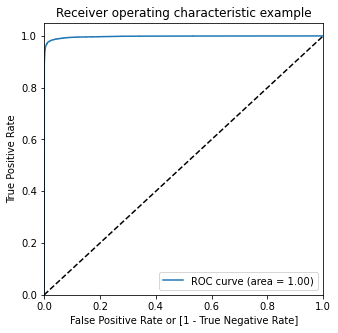

In [133]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [134]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

[[28099  7831]
 [  930  3140]]
Accuracy:- 0.780975
Sensitivity:- 0.7714987714987716
Specificity:- 0.7820484274979126
F1-Score:- 0.4175254304899941
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     35930
           1       0.29      0.77      0.42      4070

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

roc_auc test score= 0.8584886802142577


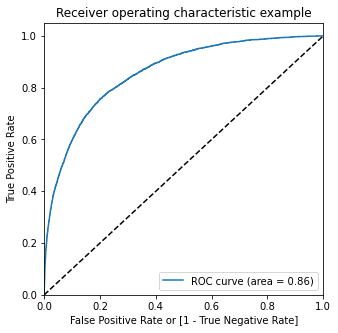

In [135]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - XGBoost Model Summary

- Train data                       
  - Accuracy    =  0.97                 
  - Sensitivity =  0.96
  - Specifivty  =  0.99
  - F1-Score    =  0.97
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.78                   
  - Sensitivity =  0.77
  - Specifivty  =  0.78
  - F1-Score    =  0.41
  - ROC         =  0.85

## Oversampling
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [136]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [137]:
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Before sampling class distribution:-',Counter(y_train))
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 143972, 1: 16028})
New class distribution:- Counter({0: 143972, 1: 143972})


##### Logistic regression

In [138]:
# Lets create K-Fold method with number of split =5
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Declare C value parameter as 0.01,0.1,1,10,100,1000, and identify C value

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.611990,5.805183,0.201392,0.272134,0.01,{'C': 0.01},0.85802,0.860376,0.859867,0.863315,0.859207,0.860157,0.001765,1,0.861303,0.860705,0.860852,0.859974,0.861008,0.860768,0.000444
1,5.543106,4.458544,0.375033,0.357507,0.1,{'C': 0.1},0.85802,0.860376,0.859867,0.863314,0.859206,0.860157,0.001765,2,0.861303,0.860705,0.860852,0.859975,0.861008,0.860769,0.000444
2,1.703748,0.224750,0.069694,0.007585,1,{'C': 1},0.85802,0.860376,0.859867,0.863314,0.859206,0.860157,0.001765,4,0.861303,0.860705,0.860852,0.859975,0.861008,0.860769,0.000444
3,7.527243,7.241183,0.513435,0.685480,10,{'C': 10},0.85802,0.860376,0.859867,0.863314,0.859206,0.860157,0.001765,6,0.861303,0.860705,0.860852,0.859974,0.861008,0.860769,0.000444
4,1.574862,0.137260,0.072413,0.007025,100,{'C': 100},0.85802,0.860376,0.859867,0.863314,0.859206,0.860157,0.001765,3,0.861303,0.860705,0.860852,0.859974,0.861008,0.860769,0.000444
5,1.925675,0.367193,0.097673,0.060673,1000,{'C': 1000},0.85802,0.860376,0.859867,0.863314,0.859206,0.860157,0.001765,5,0.861303,0.860705,0.860852,0.859974,0.861008,0.860769,0.000444


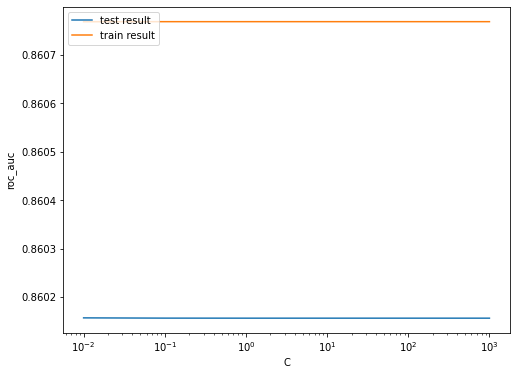

In [139]:
# Lets plot train and validation scores against C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [140]:
# Now lets see best c score
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.8601572042453144 at C = 0.01


In [141]:
# Let's see the model with best C value , c=0.01
logistic_bal_ros = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [142]:
def train_pred_ros():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

    # classification_report
    print(classification_report(y_train_ros, y_train_pred))

    # classification_report
    print(classification_report(y_train_ros, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [143]:
def test_pred_ros():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

[[112576  31396]
 [ 31940 112032]]
Accuracy:- 0.7800405634428916
Sensitivity:- 0.7781513071986219
Specificity:- 0.7819298196871614
F1-Score:- 0.7796242171189979
              precision    recall  f1-score   support

           0       0.78      0.78      0.78    143972
           1       0.78      0.78      0.78    143972

    accuracy                           0.78    287944
   macro avg       0.78      0.78      0.78    287944
weighted avg       0.78      0.78      0.78    287944

              precision    recall  f1-score   support

           0       0.78      0.78      0.78    143972
           1       0.78      0.78      0.78    143972

    accuracy                           0.78    287944
   macro avg       0.78      0.78      0.78    287944
weighted avg       0.78      0.78      0.78    287944

roc_auc train score= 0.8607064372065869


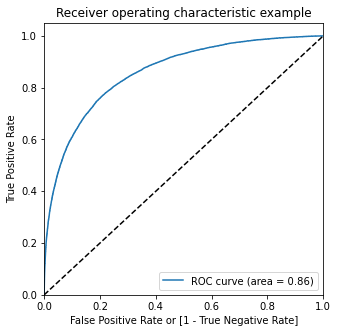

In [144]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [145]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

[[28048  7882]
 [  883  3187]]
Accuracy:- 0.780875
Sensitivity:- 0.783046683046683
Specificity:- 0.7806290008349569
F1-Score:- 0.4210317722438734
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35930
           1       0.29      0.78      0.42      4070

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

roc_auc test score= 0.860969575703781


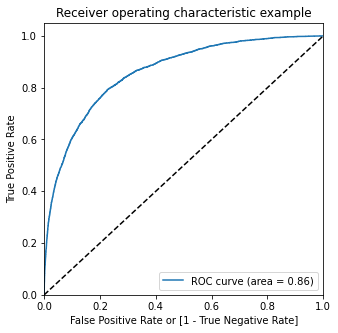

In [146]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Logistic regression Model Summary

- Train data                       
  - Accuracy    =  0.78                 
  - Sensitivity =  0.77
  - Specifivty  =  0.78
  - F1-Score    =  0.78
  - ROC         =  0.86

- Test data                       
  - Accuracy    =  0.78                   
  - Sensitivity =  0.78
  - Specifivty  =  0.78
  - F1-Score    =  0.42
  - ROC         =  0.86

##### Decision Tree

In [147]:
# Lets create Param_grid with default values and find best grd search estimator 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,29.542548,0.932770,0.104158,0.007363,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.644514,0.644330,0.640188,0.643011,0.001997,7
1,29.730150,1.882198,0.120605,0.020396,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.644514,0.644330,0.640188,0.643011,0.001997,7
2,28.044799,0.101773,0.109728,0.013214,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.644510,0.644329,0.640417,0.643085,0.001888,5
3,28.434966,0.634475,0.120936,0.002851,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.644510,0.644329,0.640417,0.643085,0.001888,5
4,51.722351,0.941572,0.156329,0.044079,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.717968,0.718883,0.717684,0.718178,0.000512,2
5,66.013720,13.252451,0.136697,0.005809,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.718010,0.719010,0.717690,0.718236,0.000562,1
6,54.346327,4.088575,0.159786,0.021310,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.711683,0.714321,0.714320,0.713441,0.001243,4
7,71.132527,0.624313,0.156217,0.012758,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.711707,0.714321,0.714398,0.713475,0.001251,3


In [148]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.7182364148449837
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [149]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [150]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

[[111667  32305]
 [ 59168  84804]]
Accuracy:- 0.6823236462645514
Sensitivity:- 0.5890312005112105
Specificity:- 0.7756160920178924
F1-Score:- 0.6496374688315121
              precision    recall  f1-score   support

           0       0.65      0.78      0.71    143972
           1       0.72      0.59      0.65    143972

    accuracy                           0.68    287944
   macro avg       0.69      0.68      0.68    287944
weighted avg       0.69      0.68      0.68    287944

              precision    recall  f1-score   support

           0       0.65      0.78      0.71    143972
           1       0.72      0.59      0.65    143972

    accuracy                           0.68    287944
   macro avg       0.69      0.68      0.68    287944
weighted avg       0.69      0.68      0.68    287944

roc_auc train score= 0.7410206093862813


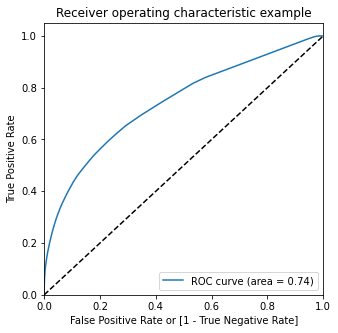

In [151]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [152]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

[[27437  8493]
 [ 2254  1816]]
Accuracy:- 0.731325
Sensitivity:- 0.4461916461916462
Specificity:- 0.76362371277484
F1-Score:- 0.25259058348981156
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     35930
           1       0.18      0.45      0.25      4070

    accuracy                           0.73     40000
   macro avg       0.55      0.60      0.54     40000
weighted avg       0.85      0.73      0.78     40000

roc_auc test score= 0.6374433053350392


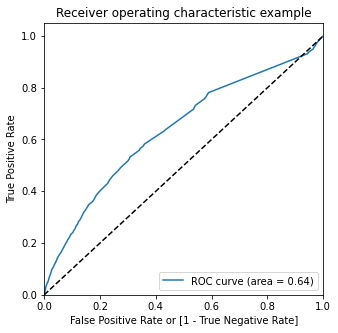

In [153]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.68                 
  - Sensitivity =  0.58
  - Specifivty  =  0.77
  - F1-Score    =  0.64
  - ROC         =  0.74

- Test data                       
  - Accuracy    =  0.73                   
  - Sensitivity =  0.44
  - Specifivty  =  0.76
  - F1-Score    =  0.25
  - ROC         =  0.64

#####  Random forest

In [154]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_ros, y_train_ros)
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
We can get roc-auc of 0.8210578031643229 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [155]:
# model with the best hyperparameters

rfc_bal_ros_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)
# Fit the model
rfc_bal_ros_model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300)

In [156]:
# Predictions on the train set
y_train_pred = rfc_bal_ros_model.predict(X_train_ros)

[[111032  32940]
 [ 42051 101921]]
Accuracy:- 0.7395639429889145
Sensitivity:- 0.7079223737949045
Specificity:- 0.7712055121829244
F1-Score:- 0.7310540717920763
              precision    recall  f1-score   support

           0       0.73      0.77      0.75    143972
           1       0.76      0.71      0.73    143972

    accuracy                           0.74    287944
   macro avg       0.74      0.74      0.74    287944
weighted avg       0.74      0.74      0.74    287944

              precision    recall  f1-score   support

           0       0.73      0.77      0.75    143972
           1       0.76      0.71      0.73    143972

    accuracy                           0.74    287944
   macro avg       0.74      0.74      0.74    287944
weighted avg       0.74      0.74      0.74    287944

roc_auc train score= 0.8177757334769764


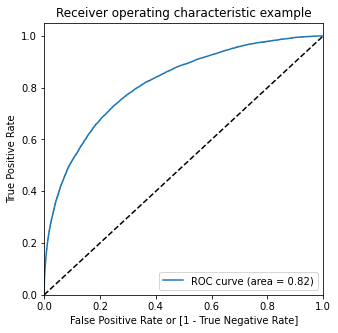

In [157]:
# Predicted probability
y_train_pred_proba = rfc_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [158]:
# Predictions on the test set
y_test_pred = rfc_bal_ros_model.predict(X_test)

[[27646  8284]
 [ 1297  2773]]
Accuracy:- 0.760475
Sensitivity:- 0.6813267813267814
Specificity:- 0.7694405789034233
F1-Score:- 0.3666292060553976
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     35930
           1       0.25      0.68      0.37      4070

    accuracy                           0.76     40000
   macro avg       0.60      0.73      0.61     40000
weighted avg       0.88      0.76      0.80     40000

roc_auc test score= 0.798842145285229


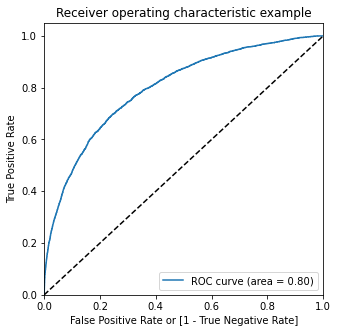

In [159]:
# Predicted probability
y_test_pred_proba = rfc_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Random Forest Model Summary

- Train data                       
  - Accuracy    =  0.73                 
  - Sensitivity =  0.71
  - Specifivty  =  0.77
  - F1-Score    =  0.73
  - ROC         =  0.82

- Test data                       
  - Accuracy    =  0.76                   
  - Sensitivity =  0.68
  - Specifivty  =  0.77
  - F1-Score    =  0.37
  - ROC         =  0.80

#####  XGBoost

In [160]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros) 
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[10:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:08]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,149.444441,2.201634,0.301200,0.014317,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.887626,0.886897,0.889231,0.887918,0.000975,6,0.892697,0.893627,0.894560,0.893628,0.000761
1,190.766162,4.472054,0.292529,0.008185,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.888714,0.887347,0.889656,0.888572,0.000948,5,0.894414,0.894997,0.895125,0.894845,0.000309
2,207.813855,0.953697,0.294877,0.016477,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.888281,0.888974,0.889882,0.889045,0.000656,4,0.895034,0.896661,0.895159,0.895618,0.000739
3,148.702470,2.781987,0.290224,0.004071,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.905965,0.904361,0.904781,0.905036,0.000679,3,0.913338,0.913388,0.913585,0.913437,0.000106
4,192.587607,1.071626,0.308507,0.012625,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.909103,0.907971,0.908996,0.908690,0.000510,2,0.917518,0.917986,0.917082,0.917529,0.000369
5,214.745401,6.767554,0.311167,0.017635,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.910555,0.908871,0.909174,0.909533,0.000733,1,0.919018,0.919234,0.918387,0.918880,0.000359


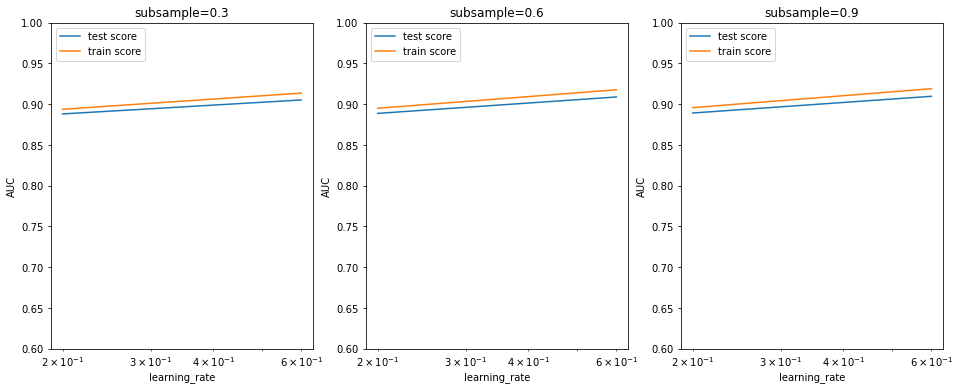

In [161]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [162]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [163]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[11:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [164]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

[[134235   9737]
 [  8268 135704]]
Accuracy:- 0.9374704803711833
Sensitivity:- 0.942572166810213
Specificity:- 0.9323687939321534
F1-Score:- 0.9377878671656077
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    143972
           1       0.93      0.94      0.94    143972

    accuracy                           0.94    287944
   macro avg       0.94      0.94      0.94    287944
weighted avg       0.94      0.94      0.94    287944

              precision    recall  f1-score   support

           0       0.94      0.93      0.94    143972
           1       0.93      0.94      0.94    143972

    accuracy                           0.94    287944
   macro avg       0.94      0.94      0.94    287944
weighted avg       0.94      0.94      0.94    287944

roc_auc train score= 0.9837391161738696


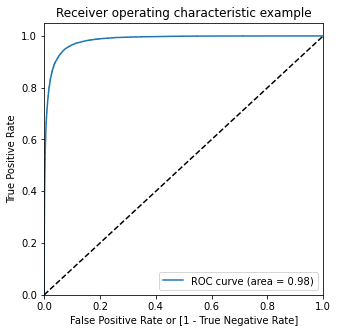

In [165]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [166]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

[[32334  3596]
 [ 1664  2406]]
Accuracy:- 0.8685
Sensitivity:- 0.5911547911547912
Specificity:- 0.8999165043139438
F1-Score:- 0.4777601270849881
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     35930
           1       0.40      0.59      0.48      4070

    accuracy                           0.87     40000
   macro avg       0.68      0.75      0.70     40000
weighted avg       0.90      0.87      0.88     40000

roc_auc test score= 0.8553464455524015


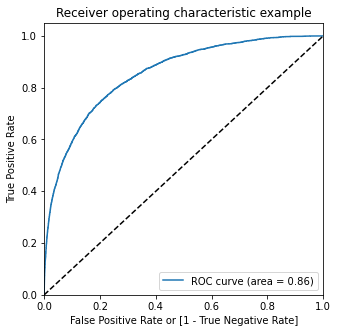

In [167]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - XGBoost Model Summary

- Train data                       
  - Accuracy    =  0.94                 
  - Sensitivity =  0.94
  - Specifivty  =  0.93
  - F1-Score    =  0.93
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  0.86                   
  - Sensitivity =  0.59
  - Specifivty  =  0.90
  - F1-Score    =  0.48
  - ROC         =  0.86

## SMOTE (Synthetic Minority Oversampling Technique)
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [169]:
# Importing SMOTE module
from imblearn.over_sampling import SMOTE

In [170]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (160000, 200)
After SMOTE oversampling X_train shape= (287944, 200)


##### Logistic regression

In [171]:
# Lets create K-Fold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Choosing params value fr c as default 0.01,0.1,1,10,100,1000 and identifiy the best c value
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.005769,0.724995,0.101104,0.074656,0.01,{'C': 0.01},0.877711,0.877276,0.879023,0.879059,0.876867,0.877987,0.000901,1,0.878649,0.878761,0.878336,0.878307,0.878857,0.878582,0.000223
1,9.946420,14.566433,0.390675,0.374094,0.1,{'C': 0.1},0.877710,0.877276,0.879022,0.879057,0.876865,0.877986,0.000901,2,0.878649,0.878760,0.878336,0.878307,0.878857,0.878582,0.000223
2,2.023642,0.097817,0.236329,0.121647,1,{'C': 1},0.877710,0.877276,0.879022,0.879056,0.876864,0.877986,0.000901,3,0.878649,0.878760,0.878335,0.878307,0.878857,0.878582,0.000223
3,3.587268,2.615772,0.111959,0.059046,10,{'C': 10},0.877710,0.877276,0.879022,0.879056,0.876864,0.877986,0.000901,6,0.878649,0.878760,0.878335,0.878307,0.878857,0.878582,0.000223
4,1.736587,0.140156,0.155005,0.058140,100,{'C': 100},0.877710,0.877276,0.879022,0.879056,0.876864,0.877986,0.000901,5,0.878649,0.878760,0.878335,0.878307,0.878857,0.878582,0.000223
5,2.068108,0.543721,0.079635,0.012515,1000,{'C': 1000},0.877710,0.877276,0.879022,0.879056,0.876864,0.877986,0.000901,4,0.878649,0.878760,0.878335,0.878307,0.878857,0.878582,0.000223


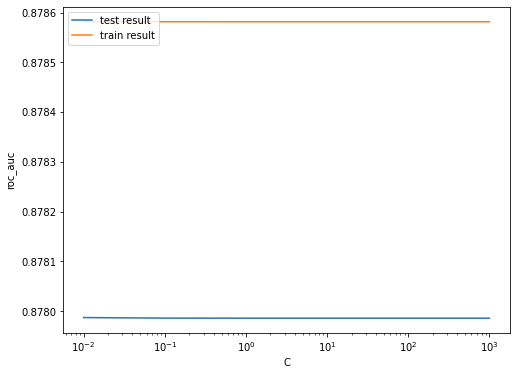

In [172]:
# plot train and validation scores for c values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [173]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.8779871300102243 at C = 0.01


In [174]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.01)

In [175]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [176]:
def train_pred_smote():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

    # classification_report
    print(classification_report(y_train_smote, y_train_pred))

    # classification_report
    print(classification_report(y_train_smote, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [177]:
def test_pred_smote():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

In [178]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

[[113732  30240]
 [ 27550 116422]]
Accuracy:- 0.7993012530214209
Sensitivity:- 0.808643347317534
Specificity:- 0.7899591587253078
F1-Score:- 0.8011588458335914
              precision    recall  f1-score   support

           0       0.80      0.79      0.80    143972
           1       0.79      0.81      0.80    143972

    accuracy                           0.80    287944
   macro avg       0.80      0.80      0.80    287944
weighted avg       0.80      0.80      0.80    287944

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    143972
           1       0.79      0.81      0.80    143972

    accuracy                           0.80    287944
   macro avg       0.80      0.80      0.80    287944
weighted avg       0.80      0.80      0.80    287944

roc_auc train score= 0.9837391161738696


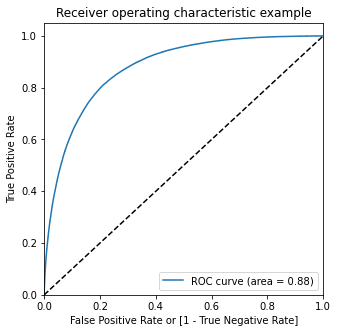

In [179]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_smote()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [180]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

[[28346  7584]
 [  932  3138]]
Accuracy:- 0.7871
Sensitivity:- 0.771007371007371
Specificity:- 0.7889229056498748
F1-Score:- 0.424283396430503
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35930
           1       0.29      0.77      0.42      4070

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.82     40000

roc_auc test score= 0.8600621465024472


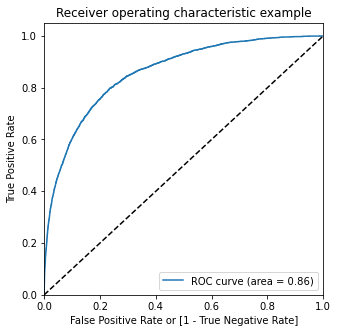

In [181]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_smote()
    
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - Logistic regression Model Summary

- Train data                       
  - Accuracy    =  0.79                 
  - Sensitivity =  0.81
  - Specifivty  =  0.79
  - F1-Score    =  0.80
  - ROC         =  0.88

- Test data                       
  - Accuracy    =  0.78                   
  - Sensitivity =  0.77
  - Specifivty  =  0.79
  - F1-Score    =  0.42
  - ROC         =  0.86

##### Decision Tree

In [182]:
# Lets create param grid with default values and find best grid searcg best estimators
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,45.854711,0.878188,0.168164,0.008955,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.615079,0.645924,0.645979,0.635660,0.014553,5
1,42.039924,1.893422,0.129297,0.017461,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.615079,0.645924,0.645979,0.635660,0.014553,5
2,43.404304,0.163333,0.165218,0.040295,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.615070,0.645924,0.645979,0.635657,0.014558,7
3,37.866564,3.159000,0.118107,0.012422,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.615070,0.645924,0.645979,0.635657,0.014558,7
4,63.301654,1.232971,0.130173,0.007370,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.679414,0.721108,0.720742,0.707088,0.019569,2
5,70.481439,10.416750,0.124261,0.012794,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.679409,0.721153,0.720708,0.707090,0.019574,1
6,89.247636,0.875483,0.156226,0.012771,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.678983,0.720689,0.720755,0.706809,0.019676,3
7,85.524413,0.750308,0.166626,0.048286,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.678889,0.720688,0.720752,0.706776,0.019719,4


In [183]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.7070896575356214
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [184]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [185]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

[[ 85589  58383]
 [ 33070 110902]]
Accuracy:- 0.6823931042147084
Sensitivity:- 0.7703025588308838
Specificity:- 0.5944836495985331
F1-Score:- 0.7080576012666916
              precision    recall  f1-score   support

           0       0.72      0.59      0.65    143972
           1       0.66      0.77      0.71    143972

    accuracy                           0.68    287944
   macro avg       0.69      0.68      0.68    287944
weighted avg       0.69      0.68      0.68    287944

              precision    recall  f1-score   support

           0       0.72      0.59      0.65    143972
           1       0.66      0.77      0.71    143972

    accuracy                           0.68    287944
   macro avg       0.69      0.68      0.68    287944
weighted avg       0.69      0.68      0.68    287944

roc_auc train score= 0.7390892151082509


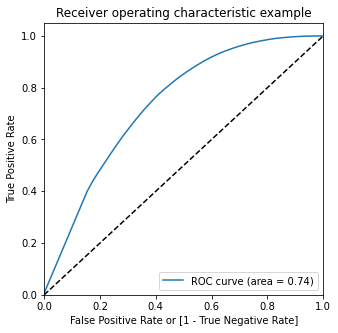

In [186]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_smote()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [187]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

[[20775 15155]
 [ 1929  2141]]
Accuracy:- 0.5729
Sensitivity:- 0.5260442260442261
Specificity:- 0.5782076259393265
F1-Score:- 0.20041186932509591
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     35930
           1       0.12      0.53      0.20      4070

    accuracy                           0.57     40000
   macro avg       0.52      0.55      0.45     40000
weighted avg       0.83      0.57      0.66     40000

roc_auc test score= 0.5692077962130843


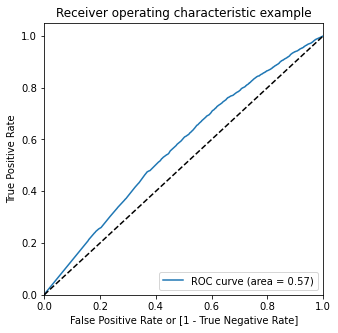

In [188]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_smote()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.68                 
  - Sensitivity =  0.77
  - Specifivty  =  0.59
  - F1-Score    =  0.70
  - ROC         =  0.74

- Test data                       
  - Accuracy    =  0.57                   
  - Sensitivity =  0.53
  - Specifivty  =  0.58
  - F1-Score    =  0.20
  - ROC         =  0.57

##### Random forest

For this one we are getting high calculation memory and it is getting flushed. We could see this didnt performed well with original dataset (imbalanced) and henceforth with manuafactured data set (balanced approach) we could not get confidence as this may or may not give good prediction compare to the earlier imbalanced data set. Henceoforth I am intentially not running this. We will skip the modeling for now.

##### XGBoost

In [189]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote) 
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:28]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,204.760627,9.488512,0.314178,0.033059,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.871036,0.956725,0.955682,0.927814,0.040150,6,0.962581,0.925868,0.926121,0.938190,0.017247
1,248.630253,22.667366,0.312427,0.025511,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.871077,0.956755,0.955827,0.927886,0.040172,5,0.963553,0.927282,0.927813,0.939549,0.016975
2,396.094783,47.992288,0.484364,0.088280,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.871028,0.957460,0.956608,0.928365,0.040545,4,0.964254,0.929067,0.928697,0.940673,0.016675
3,224.770102,3.250910,0.421421,0.054840,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.874742,0.959724,0.959782,0.931416,0.040075,3,0.969933,0.938180,0.938780,0.948964,0.014829
4,256.159108,15.063827,0.323663,0.018959,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.878324,0.961690,0.961264,0.933759,0.039199,2,0.971811,0.940711,0.940605,0.951042,0.014686
5,280.686514,4.100968,0.281869,0.000970,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.878893,0.962440,0.962355,0.934563,0.039364,1,0.973049,0.942259,0.942169,0.952493,0.014535


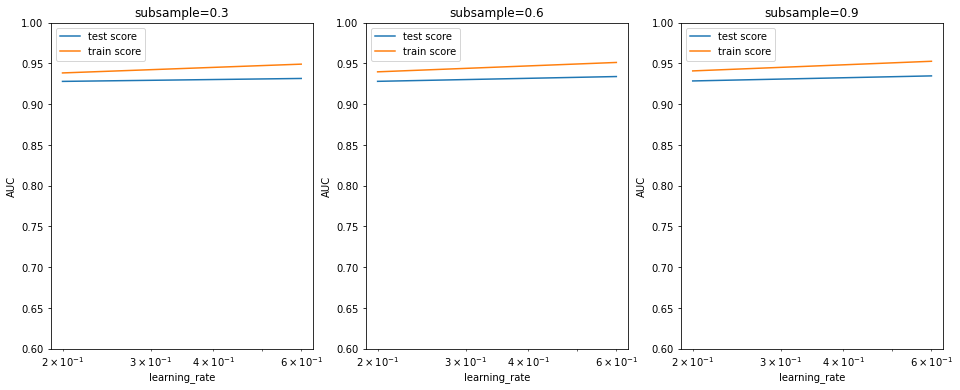

In [190]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [191]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [192]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[14:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [193]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

[[135694   8278]
 [ 10023 133949]]
Accuracy:- 0.9364425027088601
Sensitivity:- 0.930382296557664
Specificity:- 0.9425027088600562
F1-Score:- 0.9360549827218124
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    143972
           1       0.94      0.93      0.94    143972

    accuracy                           0.94    287944
   macro avg       0.94      0.94      0.94    287944
weighted avg       0.94      0.94      0.94    287944

              precision    recall  f1-score   support

           0       0.93      0.94      0.94    143972
           1       0.94      0.93      0.94    143972

    accuracy                           0.94    287944
   macro avg       0.94      0.94      0.94    287944
weighted avg       0.94      0.94      0.94    287944

roc_auc train score= 0.9839102403690543


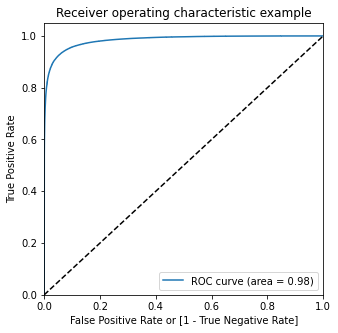

In [194]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [195]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

[[32589  3341]
 [ 2680  1390]]
Accuracy:- 0.849475
Sensitivity:- 0.3415233415233415
Specificity:- 0.9070136376287226
F1-Score:- 0.3158731962277014
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     35930
           1       0.29      0.34      0.32      4070

    accuracy                           0.85     40000
   macro avg       0.61      0.62      0.62     40000
weighted avg       0.86      0.85      0.85     40000

roc_auc test score= 0.738485558528698


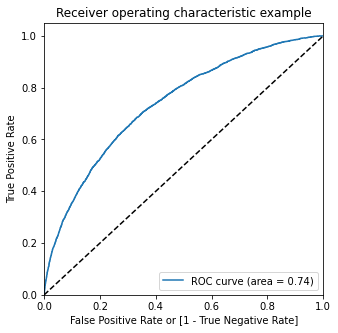

In [196]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - XGBoost Model Summary

- Train data                       
  - Accuracy    =  0.94                 
  - Sensitivity =  0.93
  - Specifivty  =  0.94
  - F1-Score    =  0.94
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  0.85                   
  - Sensitivity =  0.34
  - Specifivty  =  0.91
  - F1-Score    =  0.31
  - ROC         =  0.74

## AdaSyn (Adaptive Synthetic Sampling)
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [197]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [198]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 143972, 1: 16028})
New class distribution:- Counter({0: 143972, 1: 140354})


##### Logistic regression

In [199]:
# Creating K-Fold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Lets take default values
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [200]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.425852,0.335323,0.151013,0.058925,0.01,{'C': 0.01},0.876885,0.875576,0.877757,0.876739,0.000896,1,0.877372,0.878039,0.876897,0.877436,0.000468
1,1.249711,0.077600,0.088514,0.007353,0.1,{'C': 0.1},0.876884,0.875575,0.877756,0.876738,0.000896,2,0.877372,0.878039,0.876897,0.877436,0.000468
2,1.369464,0.158451,0.104144,0.019477,1,{'C': 1},0.876884,0.875575,0.877755,0.876738,0.000896,3,0.877372,0.878039,0.876897,0.877436,0.000468
3,1.838104,0.622547,0.114555,0.007363,10,{'C': 10},0.876884,0.875575,0.877755,0.876738,0.000896,6,0.877372,0.878039,0.876897,0.877436,0.000468
4,1.286151,0.019486,0.088519,0.014728,100,{'C': 100},0.876884,0.875575,0.877755,0.876738,0.000896,4,0.877372,0.878039,0.876897,0.877436,0.000468
5,1.317398,0.048288,0.114556,0.019479,1000,{'C': 1000},0.876884,0.875575,0.877755,0.876738,0.000896,5,0.877372,0.878039,0.876897,0.877436,0.000468


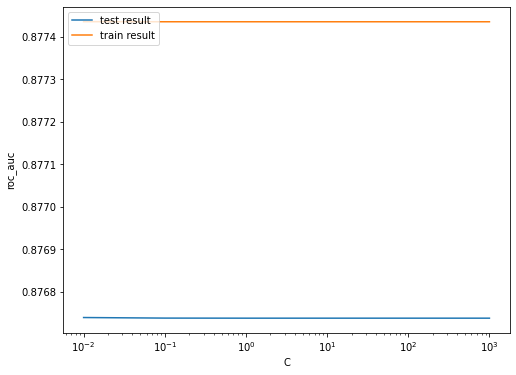

In [201]:
# Lets plot versus train and validation scores for C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [202]:
# Lets see with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.8767393530737749 at C = 0.01


In [203]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=0.01)

In [204]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [205]:
def train_pred_adasyn():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

    # classification_report
    print(classification_report(y_train_adasyn, y_train_pred))

    # roc_auc
    auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [206]:
def test_pred_adasyn():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

In [207]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

[[114137  29835]
 [ 27640 112714]]
Accuracy:- 0.7978552787996877
Sensitivity:- 0.8030693817062571
Specificity:- 0.7927722057066652
F1-Score:- 0.7968384923454329
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    143972
           1       0.79      0.80      0.80    140354

    accuracy                           0.80    284326
   macro avg       0.80      0.80      0.80    284326
weighted avg       0.80      0.80      0.80    284326

roc_auc train score= 0.8773202701570441


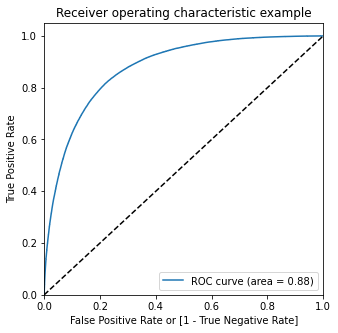

In [208]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [209]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

[[28428  7502]
 [  935  3135]]
Accuracy:- 0.789075
Sensitivity:- 0.7702702702702703
Specificity:- 0.7912051210687447
F1-Score:- 0.4263275991024682
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35930
           1       0.29      0.77      0.43      4070

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000

roc_auc test score= 0.8600166581073901


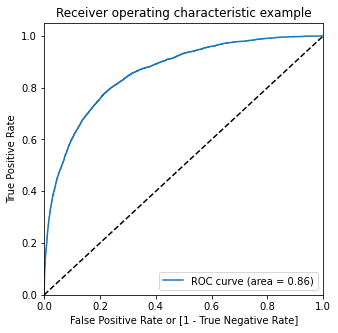

In [210]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.80                 
  - Sensitivity =  0.80
  - Specifivty  =  0.79
  - F1-Score    =  0.80
  - ROC         =  0.88

- Test data                       
  - Accuracy    =  0.79                  
  - Sensitivity =  0.77
  - Specifivty  =  0.79
  - F1-Score    =  0.43
  - ROC         =  0.86

##### Decision Tree

In [211]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,34.072949,1.746264,0.171843,0.055566,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.609608,0.640438,0.643004,0.631017,0.015174,7
1,32.877618,0.239396,0.109333,0.012780,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.609608,0.640438,0.643004,0.631017,0.015174,7
2,33.149131,0.306857,0.114534,0.007360,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.609615,0.640441,0.643004,0.631020,0.015172,5
3,33.070256,0.233803,0.114534,0.007356,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.609615,0.640441,0.643004,0.631020,0.015172,5
4,77.263653,10.655916,0.166626,0.058914,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.670623,0.710664,0.707040,0.696109,0.018082,2
5,80.557438,8.093216,0.166626,0.060278,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.670642,0.710705,0.707043,0.696130,0.018085,1
6,59.548955,0.893727,0.119767,0.007360,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.669090,0.710635,0.707583,0.695769,0.018906,3
7,59.918009,0.838562,0.124971,0.000007,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.668891,0.710623,0.707580,0.695698,0.018996,4


In [212]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.6961298745009303
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [213]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [214]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

[[ 81091  62881]
 [ 28493 111861]]
Accuracy:- 0.6786294605488067
Sensitivity:- 0.7969918919304045
Specificity:- 0.5632414636179257
F1-Score:- 0.7100121867621296
              precision    recall  f1-score   support

           0       0.74      0.56      0.64    143972
           1       0.64      0.80      0.71    140354

    accuracy                           0.68    284326
   macro avg       0.69      0.68      0.67    284326
weighted avg       0.69      0.68      0.67    284326

roc_auc train score= 0.7366178102765556


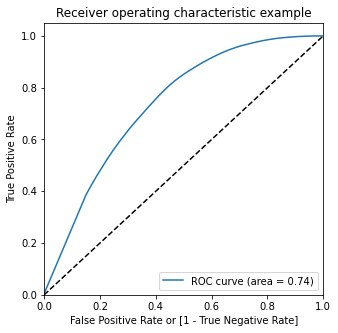

In [215]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [216]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

[[19461 16469]
 [ 1775  2295]]
Accuracy:- 0.5439
Sensitivity:- 0.5638820638820639
Specificity:- 0.5416365154467019
F1-Score:- 0.2010160287290882
              precision    recall  f1-score   support

           0       0.92      0.54      0.68     35930
           1       0.12      0.56      0.20      4070

    accuracy                           0.54     40000
   macro avg       0.52      0.55      0.44     40000
weighted avg       0.84      0.54      0.63     40000

roc_auc test score= 0.5706396754267614


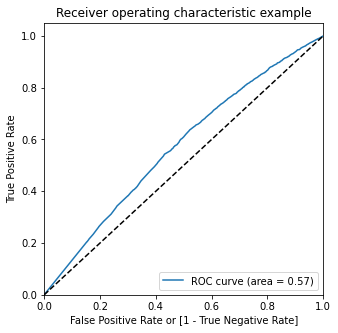

In [217]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.68                 
  - Sensitivity =  0.80
  - Specifivty  =  0.56
  - F1-Score    =  0.71
  - ROC         =  0.74

- Test data                       
  - Accuracy    =  0.54                  
  - Sensitivity =  0.56
  - Specifivty  =  0.54
  - F1-Score    =  0.20
  - ROC         =  0.57

##### Random forest

For this one we are getting high calculation memory and it is getting flushed. We could see this didnt performed well with original dataset (imbalanced) and henceforth with manuafactured data set (balanced approach) we could not get confidence as this may or may not give good prediction compare to the earlier imbalanced data set. Henceoforth I am intentially not running this. We will skip the modeling for now.

##### XGBoost

In [218]:
# hyperparameter tuning with XGBoost

# creating a K-Fold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[16:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:47]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,152.724864,4.903447,0.307219,0.019483,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.866996,0.952796,0.954857,0.924883,0.040941,5,0.962493,0.924502,0.924985,0.937327,0.017796
1,225.172397,1.383612,0.281184,0.012755,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.865735,0.953528,0.953782,0.924349,0.041446,6,0.963617,0.926701,0.926412,0.938910,0.017471
2,275.629819,3.984852,0.281184,0.000001,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.867526,0.954039,0.954754,0.925440,0.040952,4,0.964218,0.928292,0.927605,0.940039,0.017100
3,149.811661,1.224628,0.286391,0.007365,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.872780,0.957537,0.957619,0.929312,0.039974,3,0.969963,0.937792,0.936887,0.948214,0.015383
4,223.509233,1.291326,0.283336,0.001862,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.873260,0.958598,0.959422,0.930427,0.040424,2,0.972325,0.940520,0.940335,0.951060,0.015037
5,276.159863,2.830051,0.281181,0.000002,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.872368,0.959487,0.959973,0.930609,0.041183,1,0.972692,0.941808,0.941783,0.952094,0.014565


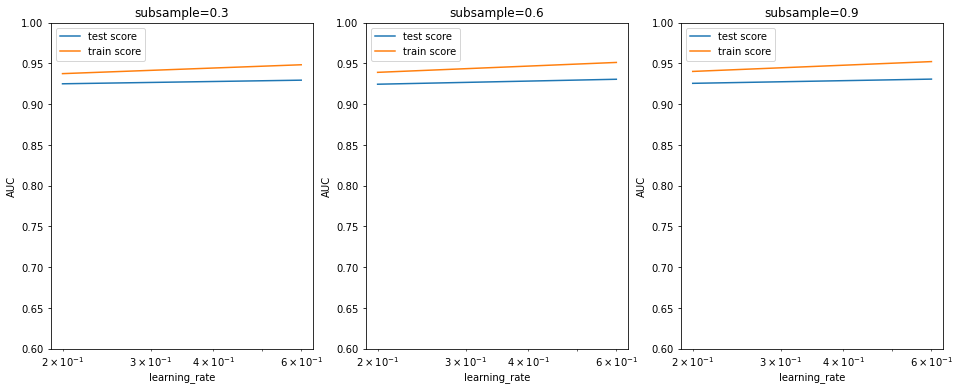

In [219]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [220]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [221]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[17:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [222]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

[[135710   8262]
 [  9992 130362]]
Accuracy:- 0.935799047572153
Sensitivity:- 0.9288085840090058
Specificity:- 0.9426138415803073
F1-Score:- 0.9345683172149776
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    143972
           1       0.94      0.93      0.93    140354

    accuracy                           0.94    284326
   macro avg       0.94      0.94      0.94    284326
weighted avg       0.94      0.94      0.94    284326

roc_auc train score= 0.9836162288610503


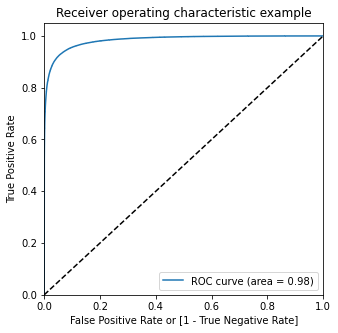

In [223]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [224]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

[[32602  3328]
 [ 2750  1320]]
Accuracy:- 0.84805
Sensitivity:- 0.32432432432432434
Specificity:- 0.9073754522682995
F1-Score:- 0.3028217481073641
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     35930
           1       0.28      0.32      0.30      4070

    accuracy                           0.85     40000
   macro avg       0.60      0.62      0.61     40000
weighted avg       0.86      0.85      0.85     40000

roc_auc test score= 0.736598142306464


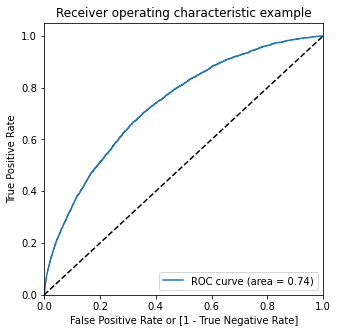

In [225]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - XGBoost Model Summary

- Train data                       
  - Accuracy    =  0.94                 
  - Sensitivity =  0.93
  - Specifivty  =  0.94
  - F1-Score    =  0.93
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  0.84                  
  - Sensitivity =  0.32
  - Specifivty  =  0.90
  - F1-Score    =  0.30
  - ROC         =  0.74



#### <font color = red> Milestone step 8  <font> - `Choosing best model on the balanced data`




### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [226]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.8785221543157327
Threshold= 0.4944008591898847


#### <font color = red> Milestone step 9  <font> - `Business Summary Report`

##### Analytics summary and theory
We tried to build several models and they are divided into two parts, one with Imbalanced dataset ( Original dataset) and another with balancing the dataset (manufactured dataset). The reason why we need to perform dataset is due to there was huge gap with transaction occurance henceforth if we do not balanced them thn there high chances that our machine learning algorith will also read false positive and make it almost 100% prediction which is in actual incorrect prediction.

While we finalized our best model we need to consider few things and this is important to take in consideration
- Infrastructure required
- Resources required
- Computational power to run the model
- Cost of deployment
- Simpler and easy to interpret 

These above features are very much needed when we deleiver any model to client. Intially we drafted 6 model however we saw KNN and SVM required huge computational power and memory, so considering this as research to read better accuracy and we have already better model with almost near to 88% prediction is fair enough to demostrate to the business.

We also guage little change in ROC score could potentially impacted the monentary charge / gain to the bank, and ofcourse if there are larger bandwdith of amount then we could consider more complex model with little higher cost. Henceforth this need to decide case by case.

#### Final summary report to business
From the analysis we conclude;

- For smaller average Transaction value :- We would like to be high precision value (Type 1 error) so that we can detect more True positive and less False Positive. This will help to tag relevant transaction correctly occurance, and with less number of false positive we can involved human or customer execute to verify by calling to customer, and lets assume precision is low which mean quite a number of breaks will appear and this will be add ons to customer execute to call them to identify / confirm the fraudent transaction which mean quite a number of effort / cost will be involved.


- For larger transaction value - Lets assume recall is low (Sensitivity, which mean type 2 errors) this will mean Flase negative is high and henceforth bank need to bear the loss as they will fail to estimate the transaction, and henceforth to save the banks we must ensure recall should be high, this will save the bank from monetary / regulatory penalty loss.


Now with considering these two points in mind we also need to ensure cost vs benefit also need to be consider for better optmised model delievery. So I proposed;

ROC result with 2% better could potentially give quite a huge savings to the bank, and this will atleast either detect the fraud or minimise the error in detecting, and in both case this will save montery loss.

`Balance dataset` with `ADASYN` and `logistic regression` which is having `very good ROC` and have `high recall`. And also its simplest and easier to interpret to business, henceforth I am suggesting model with Balanace data set ADASYN technique Logistic regression as final solution.